# Human Activity Recognition
### Dataset: [Dataset link](https://www.kaggle.com/datasets/malekzadeh/motionsense-dataset?resource=download)
### Task: multiclass classification

### Commentary: 
With previous jupyter notebook I used few ML methods on defaults parameters, but just did some feature engineering. In this notebook I will focus on simple ANN. Instead of making the best classification I will try to make similiar signals as the one, which should be classified.

## load data

In [1]:
import numpy as np
import pandas as pd
import math
import os
import tensorflow as tf

In [2]:
dir_path = 'A_DeviceMotion_data'
folders = []
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    folders.append(path)
print(folders)
activity = [row[0:3] for row in folders]
activity = list(dict.fromkeys(activity))
print(activity)

['dws_1', 'dws_11', 'dws_2', 'jog_16', 'jog_9', 'sit_13', 'sit_5', 'std_14', 'std_6', 'ups_12', 'ups_3', 'ups_4', 'wlk_15', 'wlk_7', 'wlk_8']
['dws', 'jog', 'sit', 'std', 'ups', 'wlk']


## Data:
Our data will be just one column. I will lag it in order to fit the ANN with whole sentence.
Since later I would like to present on a plot results in frequency domain I would like to have to nice resolution. In frequency domain resolution is inverse propotional to lenght of signal in time domain. So I chose 7.5s as window, because it's the shortest signal in dataset is 7,54s. So long window will definetely reduce amount of train data(windows), especialy if those window do not overlap. however, we still have enoug data to feed ANN, but we should be aware of possibility overfiting.

In [3]:
def lag_features(data, win_len_s=1):
    result = pd.DataFrame()
    win_len = round(win_len_s * 50)
    for stop in range(win_len,len(data.index),win_len):
        temp = data.iloc[(stop-win_len):(stop)]
        cols_name = list(temp)
        d_row={}
        for col_name in cols_name:
            for i in range(0,win_len):
                d={col_name+'_lag_'+str(i): temp[col_name].iloc[i]}
                d_row={**d_row, **d}
        result=result.append(d_row, ignore_index=True)
    return result

In [15]:
first_data = []
short_summary = pd.DataFrame(columns=['Subject', 'n_trial', 'activity', 'rows', 'time_min'])
raw_data=pd.DataFrame()
for folder in folders:
    label = folder[0:3]
    group_id = int(folder[4:])
    catalog = os.path.join(dir_path, folder)
    for path in os.listdir(catalog):
        temp_path = os.path.join(catalog, path)
        subject = int(path[4:-4])
        temp = pd.read_csv(temp_path, index_col=0)
        temp_lag = lag_features(temp[["gravity.z"]], 7.5)
        temp_lag['label'] = label
        print(f"label: {label}, measurment_gorup: {group_id}, subject_nr: {subject}")
        short_summary = short_summary.append({'Subject' : subject,
                                              'n_trial' : folder[4:],
                                              'activity' : label,
                                              'rows' : len(temp.index),
                                              'time_min': len(temp.index)/50/60},
                                             ignore_index = True)
        first_data.append([label, subject, temp])
        raw_data = raw_data.append(temp_lag)

label: dws, measurment_gorup: 1, subject_nr: 1
label: dws, measurment_gorup: 1, subject_nr: 10
label: dws, measurment_gorup: 1, subject_nr: 11
label: dws, measurment_gorup: 1, subject_nr: 12
label: dws, measurment_gorup: 1, subject_nr: 13
label: dws, measurment_gorup: 1, subject_nr: 14
label: dws, measurment_gorup: 1, subject_nr: 15
label: dws, measurment_gorup: 1, subject_nr: 16
label: dws, measurment_gorup: 1, subject_nr: 17
label: dws, measurment_gorup: 1, subject_nr: 18
label: dws, measurment_gorup: 1, subject_nr: 19
label: dws, measurment_gorup: 1, subject_nr: 2
label: dws, measurment_gorup: 1, subject_nr: 20
label: dws, measurment_gorup: 1, subject_nr: 21
label: dws, measurment_gorup: 1, subject_nr: 22
label: dws, measurment_gorup: 1, subject_nr: 23
label: dws, measurment_gorup: 1, subject_nr: 24
label: dws, measurment_gorup: 1, subject_nr: 3
label: dws, measurment_gorup: 1, subject_nr: 4
label: dws, measurment_gorup: 1, subject_nr: 5
label: dws, measurment_gorup: 1, subject_nr: 

label: std, measurment_gorup: 14, subject_nr: 12
label: std, measurment_gorup: 14, subject_nr: 13
label: std, measurment_gorup: 14, subject_nr: 14
label: std, measurment_gorup: 14, subject_nr: 15
label: std, measurment_gorup: 14, subject_nr: 16
label: std, measurment_gorup: 14, subject_nr: 17
label: std, measurment_gorup: 14, subject_nr: 18
label: std, measurment_gorup: 14, subject_nr: 19
label: std, measurment_gorup: 14, subject_nr: 2
label: std, measurment_gorup: 14, subject_nr: 20
label: std, measurment_gorup: 14, subject_nr: 21
label: std, measurment_gorup: 14, subject_nr: 22
label: std, measurment_gorup: 14, subject_nr: 23
label: std, measurment_gorup: 14, subject_nr: 24
label: std, measurment_gorup: 14, subject_nr: 3
label: std, measurment_gorup: 14, subject_nr: 4
label: std, measurment_gorup: 14, subject_nr: 5
label: std, measurment_gorup: 14, subject_nr: 6
label: std, measurment_gorup: 14, subject_nr: 7
label: std, measurment_gorup: 14, subject_nr: 8
label: std, measurment_goru

label: wlk, measurment_gorup: 8, subject_nr: 15
label: wlk, measurment_gorup: 8, subject_nr: 16
label: wlk, measurment_gorup: 8, subject_nr: 17
label: wlk, measurment_gorup: 8, subject_nr: 18
label: wlk, measurment_gorup: 8, subject_nr: 19
label: wlk, measurment_gorup: 8, subject_nr: 2
label: wlk, measurment_gorup: 8, subject_nr: 20
label: wlk, measurment_gorup: 8, subject_nr: 21
label: wlk, measurment_gorup: 8, subject_nr: 22
label: wlk, measurment_gorup: 8, subject_nr: 23
label: wlk, measurment_gorup: 8, subject_nr: 24
label: wlk, measurment_gorup: 8, subject_nr: 3
label: wlk, measurment_gorup: 8, subject_nr: 4
label: wlk, measurment_gorup: 8, subject_nr: 5
label: wlk, measurment_gorup: 8, subject_nr: 6
label: wlk, measurment_gorup: 8, subject_nr: 7
label: wlk, measurment_gorup: 8, subject_nr: 8
label: wlk, measurment_gorup: 8, subject_nr: 9


In [16]:
short_summary.describe()

,time_min
count,360.000000
mean,1.308208
std,0.948504
min,0.125667
25%,0.633583
50%,0.982833
75%,1.726000
max,5.474667


Preproces just for feeding ANN. I would say in this case there is no need for scaler function since the range on sensors are fixed, and we might want to see the difference in amplitudes, howver, in order to fulfill good practices it's done.

In [17]:
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(raw_data.drop(["label"], axis=1).fillna(0),
                                                                    raw_data["label"].tolist(),
                                                                    test_size=0.2, 
                                                                    random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_raw)
X_train_raw = scaler.transform(X_train_raw)
X_test_raw = scaler.transform(X_test_raw)

In [19]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(raw_data["label"].tolist())
print(lb.classes_)
y_train_raw = lb.transform(y_train_raw)
y_test_raw = lb.transform(y_test_raw)

['dws' 'jog' 'sit' 'std' 'ups' 'wlk']


In [161]:
#model.save('goodmodel')
model = tf.keras.models.load_model('goodmodel')

# Idea:
What's idea of this notebook?

Well, consider single perceptron. We have input $x_i$ and weights $w_i$ so the output, which is put into activation function is: $y=\sum_{n=0}^{n-1} x_i \bullet w_i$. Since we know our input consist of previous values of our varaible in time we can call it signal. There is also no restriction we can call $w_i$ a signal too. What does it provides to us?
Well, if we say that both $x_i$ and $w_i$ are discrete values of varaible at givent time $t$ the value of $y$ can be considered of being crosscorrelation of those two signals at $lag=0$. [Wikipedia cross-correlation link](https://en.wikipedia.org/wiki/Cross-correlation)

But why is this so important?<br />
Machine learning tends to find patterns. If we would also limit weighst at second layer to be non-negative we will somehow force network to search for positive correlation values. If the correlation values are realitvely high signals are similiar to each other. So in other words it can be used as form for finding "average" signal for each class. In second layer we have output layer. Each perceptron will be responsible for single class. We can take weights from it and see which perceptron in first layer have the biggest impact, or taking correlation into account, which perceptron generates most similiar signal to our class.

But here comes some issues, due to characteristic of human activity we expect energy to be located in low-freqency. High-frequency won't be to much significant, so while weigst will be adjusted the frequency representation won't change much in high-frequency domain. In order to reduce "noise" starting weights in first layer were set to 0. However, if we take ReLU and weight default values are 0 it won't update weights in backpropagation step. So I used ELU instead.<br />
The second important issue is number of possiblity of dividing "average" class signal into few signals. Second layer finds weight to show us which perceptrons have biggest impact on the values, however, each of those top may consist of some exclusive things for the class. Since weights won't be ```[0 1 0 0 0 0]``` we can't expect to get perfect match. Moreover, increasing amount of perceptrons in first layers will cause spreading characteristic to many "signals". On the other hand, taking just 6 perceptrons(we want to predict one of 6 classes) is not enough to get nice results, so I stick to 20 perceptrons and showing top4 "signals" for each class so we have an overview how its going.

In [160]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20,
                activation='elu',
                input_shape=(raw_data.shape[1]-1,),
                kernel_initializer=tf.keras.initializers.Zeros()))
model.add(Dense(6,
                activation='softmax',
                kernel_constraint=tf.keras.constraints.NonNeg()))
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, verbose=1)
model.fit(X_train_raw, y_train_raw,epochs=20, batch_size=4, verbose=1, callbacks=[callback])

Epoch 1/20
717/717 [==============================] - 0s 436us/step - loss: 1.2974 - accuracy: 0.5373
Epoch 2/20
717/717 [==============================] - 0s 422us/step - loss: 0.9138 - accuracy: 0.7134
Epoch 3/20
717/717 [==============================] - 0s 446us/step - loss: 0.7181 - accuracy: 0.7664
Epoch 4/20
717/717 [==============================] - 0s 429us/step - loss: 0.5969 - accuracy: 0.7960
Epoch 5/20
717/717 [==============================] - 0s 420us/step - loss: 0.5193 - accuracy: 0.8229
Epoch 6/20
717/717 [==============================] - 0s 417us/step - loss: 0.4515 - accuracy: 0.8427
Epoch 7/20
717/717 [==============================] - 0s 425us/step - loss: 0.4048 - accuracy: 0.8633
Epoch 8/20
717/717 [==============================] - 0s 432us/step - loss: 0.3649 - accuracy: 0.8797
Epoch 9/20
717/717 [==============================] - 0s 430us/step - loss: 0.3388 - accuracy: 0.8881
Epoch 10/20
717/717 [==============================] - 0s 431us/step - loss: 0.311

In [162]:
score = model.evaluate(X_test_raw, y_test_raw,verbose=1)
print(score)

23/23 [==============================] - 0s 520us/step - loss: 0.3161 - accuracy: 0.9038
[0.31613898277282715, 0.9037656784057617]


So accuracy isn't bad. Especialy for signle varaible in time. But why we are taking look at frequency domain instead of time-domain. Well, signal in time domain can have phase shifted a bit, moreover some changes in higher frequencies might be undetected with naked eye in time domain. Taking look at amplitude in frequency domain allow us also to see if those are similar to each other. First we will present all 20 genereted "signals"

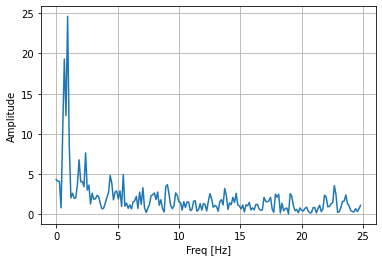

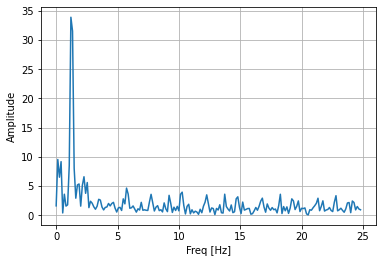

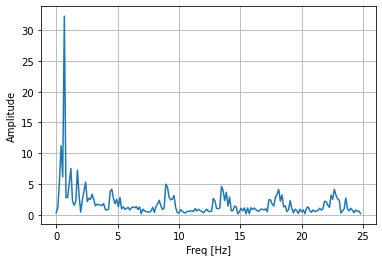

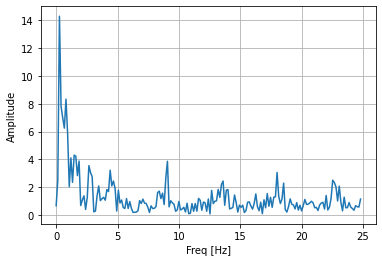

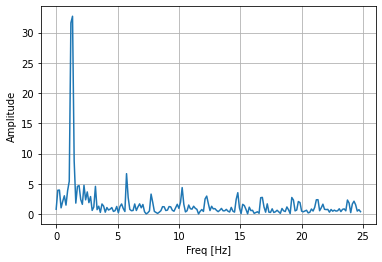

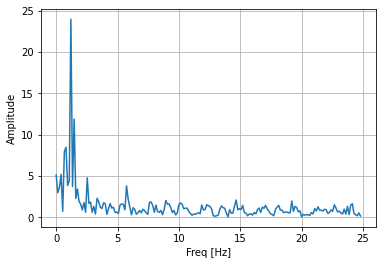

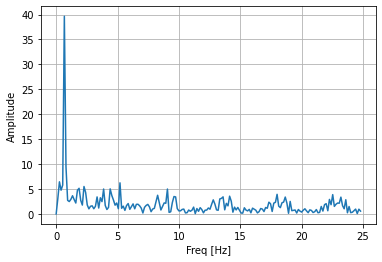

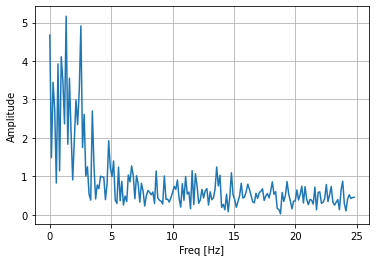

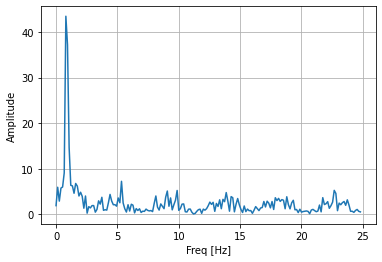

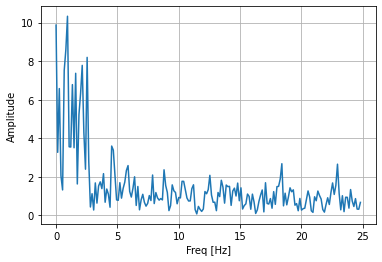

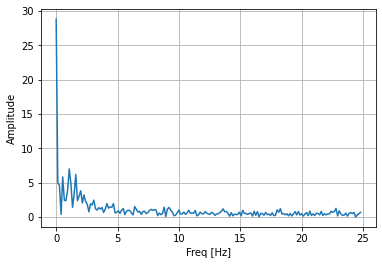

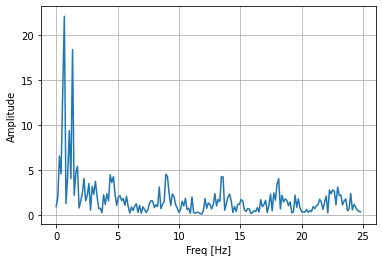

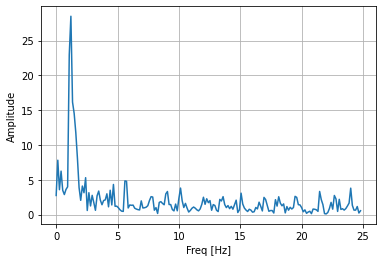

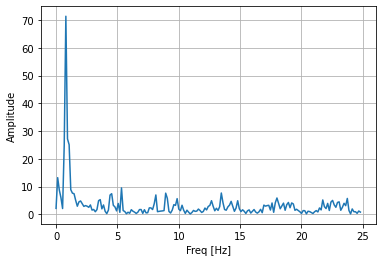

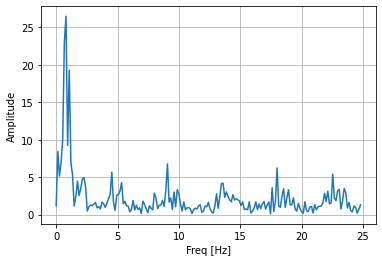

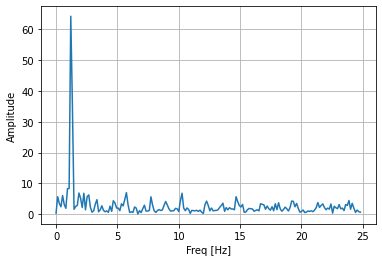

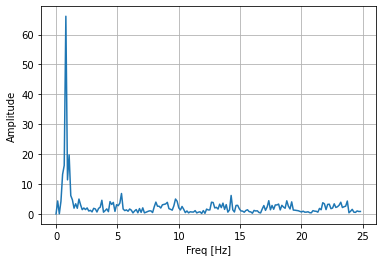

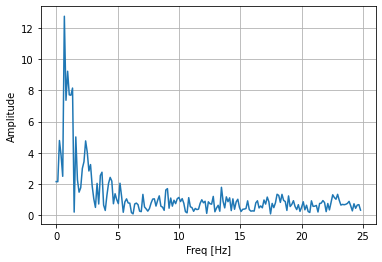

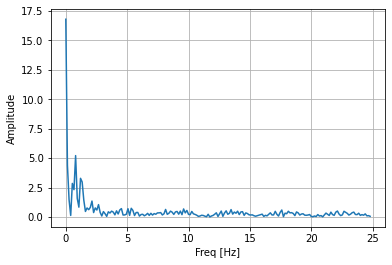

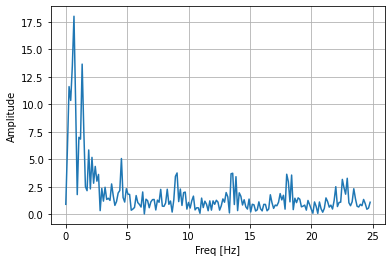

In [159]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
N = raw_data.shape[1]-1
T = 1/50
xf = fftfreq(N, T)[0:N//2]
for filterek in np.transpose(model.layers[0].get_weights()[0],(1,0)):
    plt.figure()
    plt.plot(xf, np.abs(fft(filterek)[0:N//2]))
    plt.grid()
    plt.ylabel('Amplitude')
    plt.xlabel('Freq [Hz]')
    plt.show()

Now each of top4 signals for each class

dws


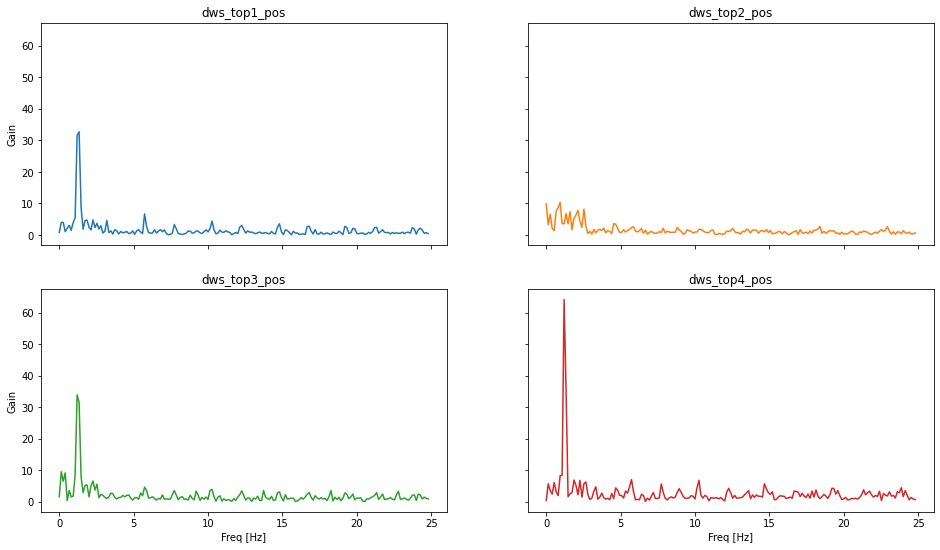

jog


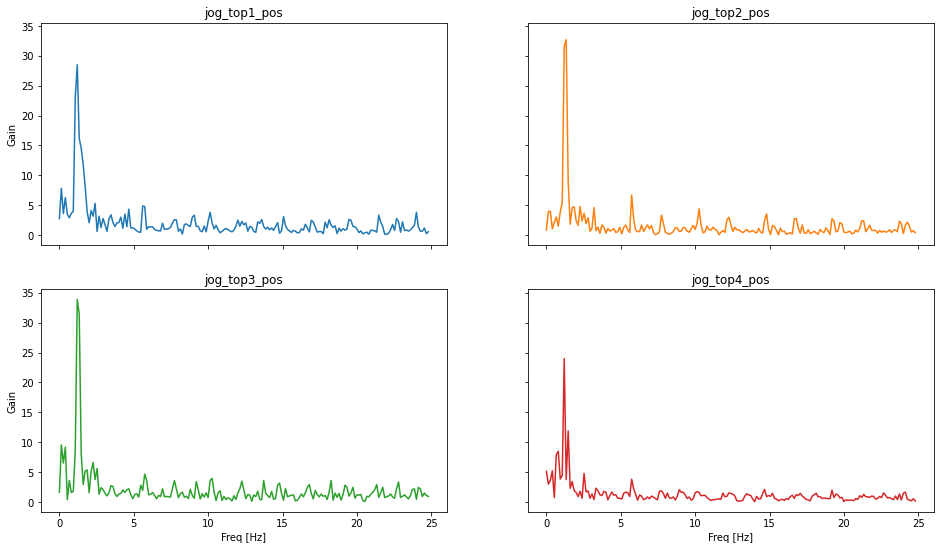

sit


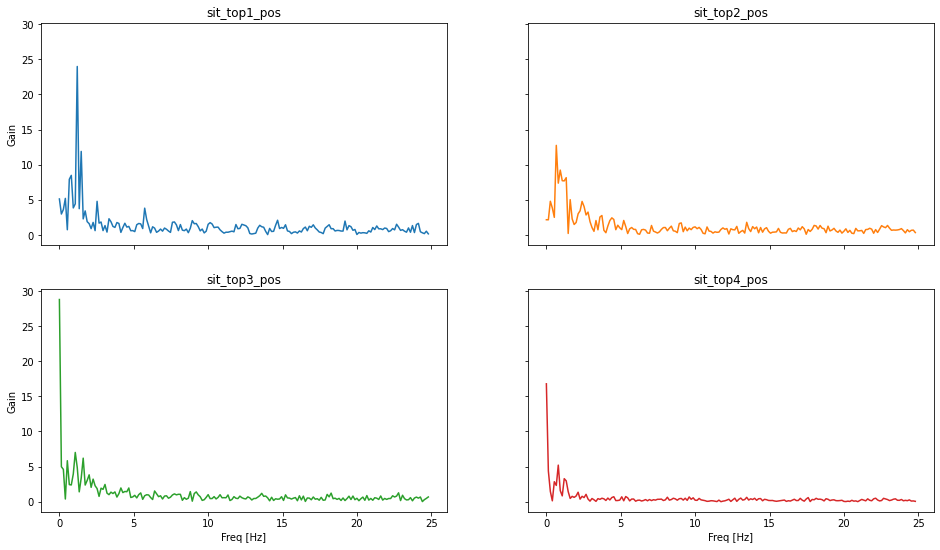

std


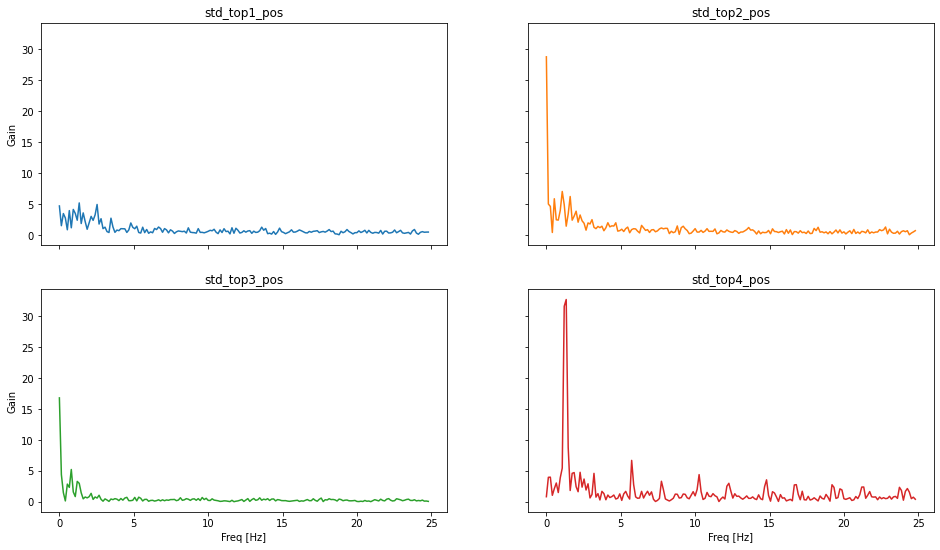

ups


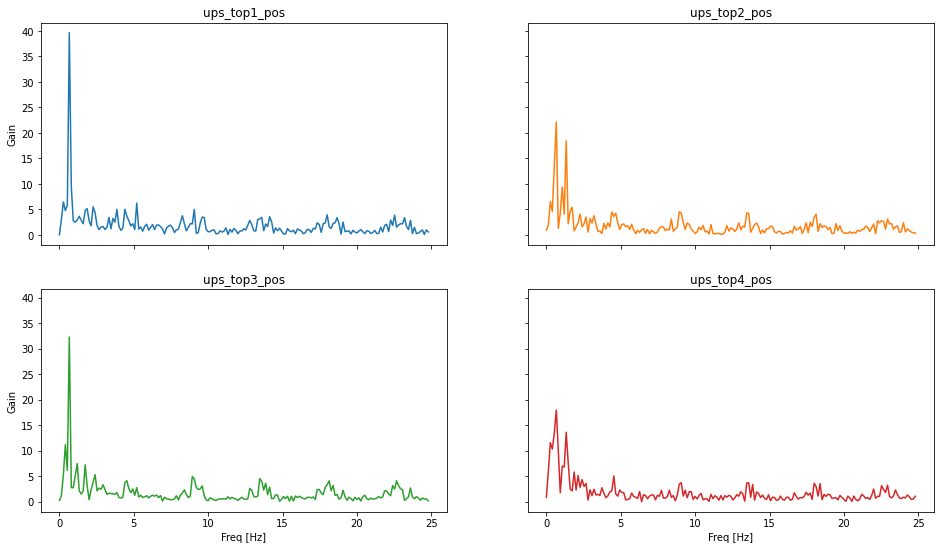

wlk


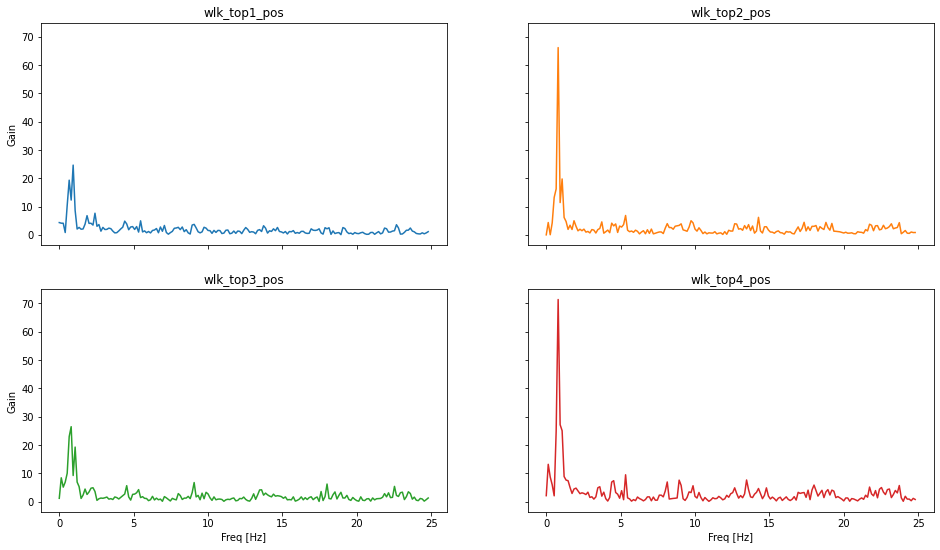

In [151]:
impact = np.transpose(model.layers[1].get_weights()[0],(1,0))
filters = np.transpose(model.layers[0].get_weights()[0],(1,0))
for i, activity in enumerate(lb.classes_):
    print(activity)
    sorted_ind = np.flip(np.argsort(np.abs(impact[i])))
    sign = ['_neg' if val<0 else '_pos' for val in (impact[i][sorted_ind])]
    fig, axs = plt.subplots(2, 2, figsize=(16,9), sharey=True)
    axs[0, 0].plot(xf, np.abs(fft(filters[sorted_ind[0]])[0:N//2]))
    axs[0, 0].set_title(activity+'_top1'+sign[0])
    axs[0, 1].plot(xf, np.abs(fft(filters[sorted_ind[1]])[0:N//2]), 'tab:orange')
    axs[0, 1].set_title(activity+'_top2'+sign[1])
    axs[1, 0].plot(xf, np.abs(fft(filters[sorted_ind[2]])[0:N//2]), 'tab:green')
    axs[1, 0].set_title(activity+'_top3'+sign[2])
    axs[1, 1].plot(xf, np.abs(fft(filters[sorted_ind[3]])[0:N//2]), 'tab:red')
    axs[1, 1].set_title(activity+'_top4'+sign[3])
    for ax in axs.flat:
        ax.set(xlabel='Freq [Hz]', ylabel='Gain')
        ax.label_outer()
    plt.show()
    

And for comparison random 4 samples of each classes

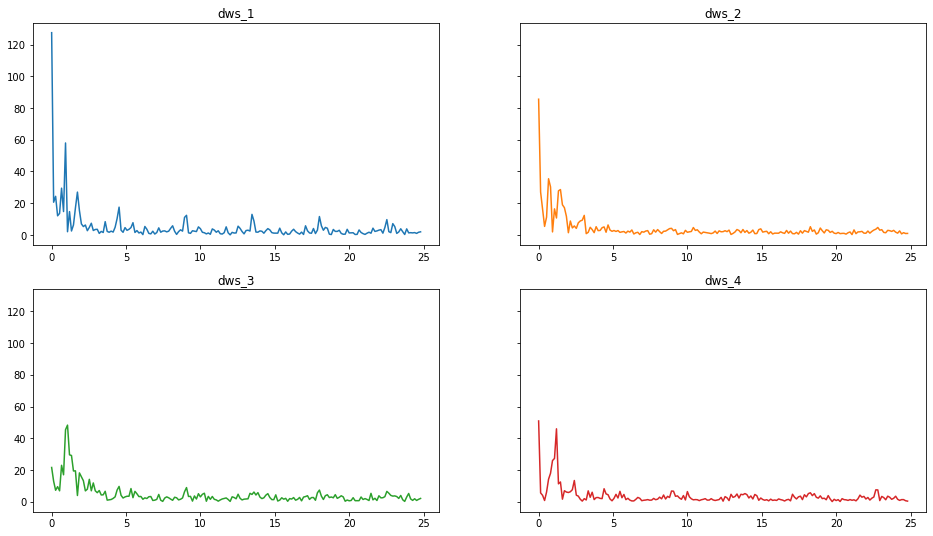

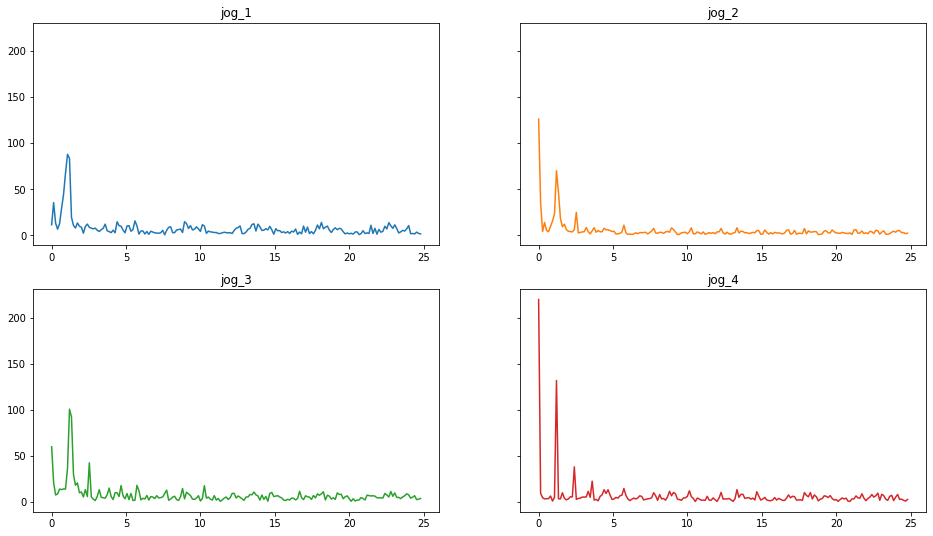

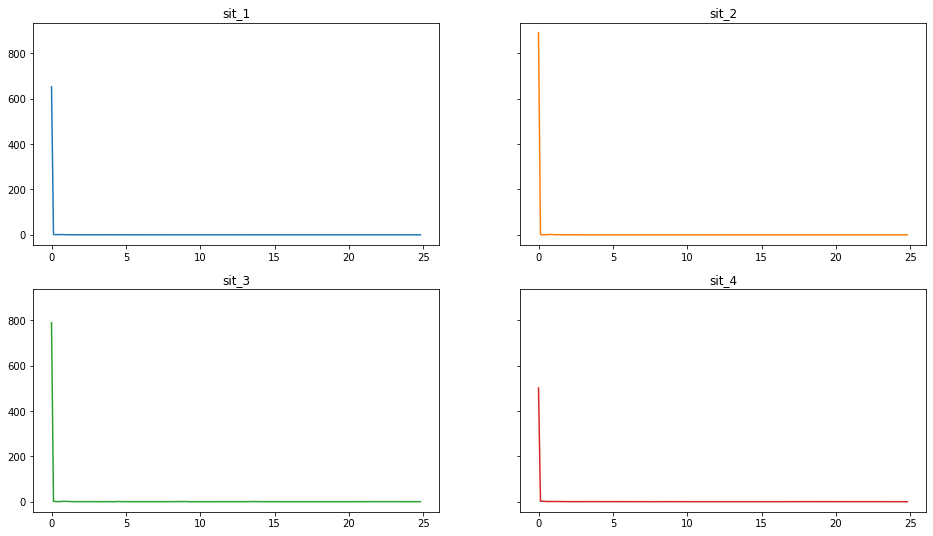

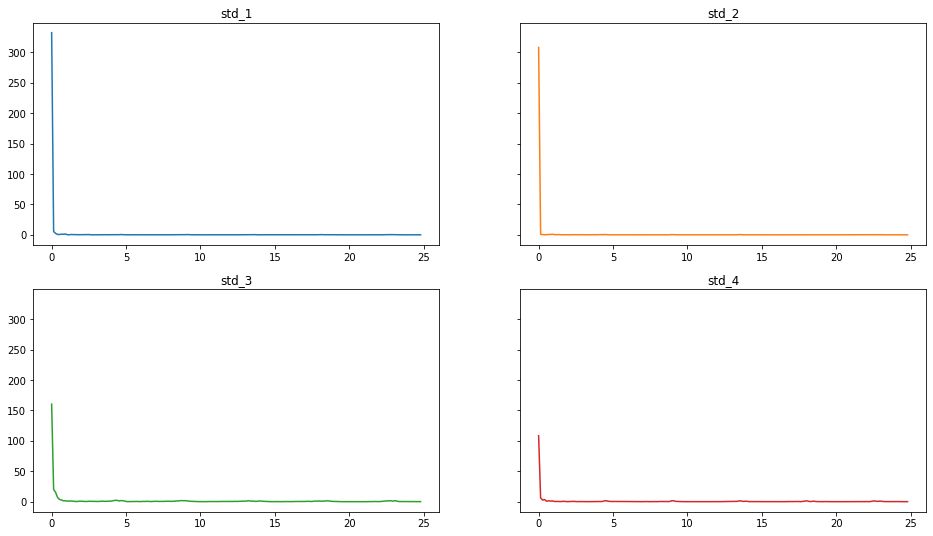

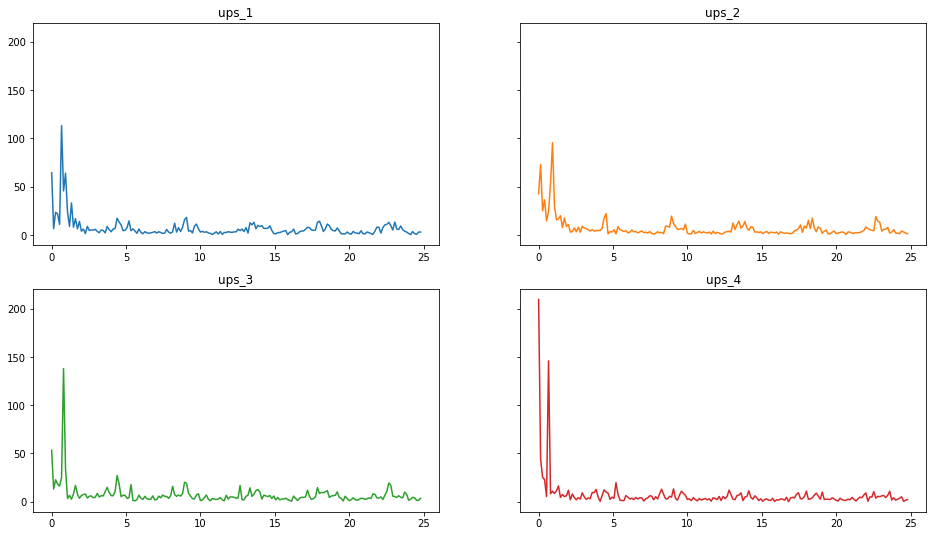

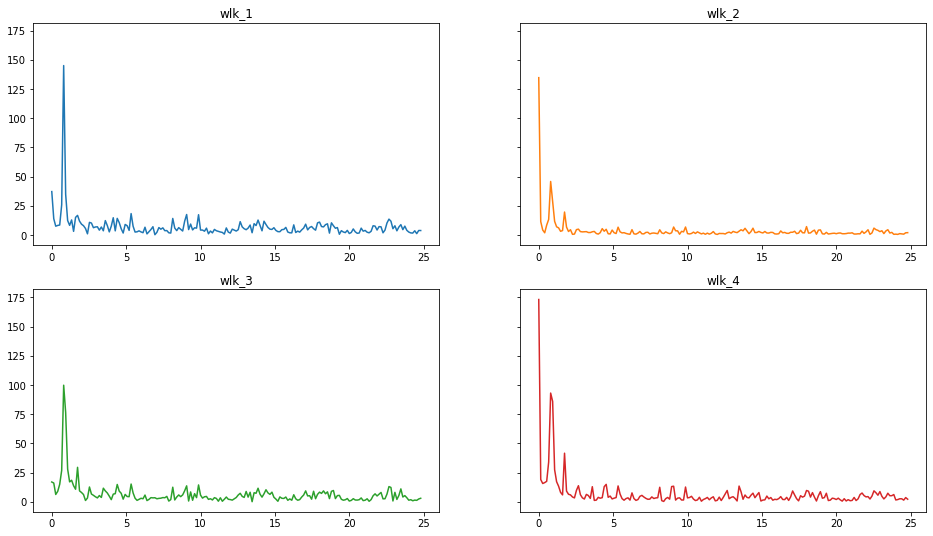

In [143]:
for activity in lb.classes_:
    temp_act = scaler.transform(raw_data[raw_data['label'].str.match(activity)]\
                                                            .sample(n = 4)\
                                                            .reset_index(drop=True)\
                                                            .drop(['label'], axis=1))
    fig, axs = plt.subplots(2, 2, figsize=(16,9), sharey=True)
    axs[0, 0].plot(xf, np.abs(fft(temp_act[0])[0:N//2]))
    axs[0, 0].set_title(activity+'_1')
    axs[0, 1].plot(xf, np.abs(fft(temp_act[1])[0:N//2]), 'tab:orange')
    axs[0, 1].set_title(activity+'_2')
    axs[1, 0].plot(xf, np.abs(fft(temp_act[2])[0:N//2]), 'tab:green')
    axs[1, 0].set_title(activity+'_3')
    axs[1, 1].plot(xf, np.abs(fft(temp_act[3])[0:N//2]), 'tab:red')
    axs[1, 1].set_title(activity+'_4')
    for ax in axs.flat:
        ax.set(xlabel='Freq [Hz]', ylabel='Amplitude')
        ax.label_outer()

# Summary:
Results on first impression may not satisfy our expectations. However, they really do. Not all "signals" pointed by ANN are similar to class examples, but some of them are really on proper way. More data could solve problem, more epoch too, however, it may tend to overfiting instead of generalize the problem.